# Exploratory Data Analysis Churn Analysis


###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# Import Library

In [ ]:
import pandas as pd #digunakan untuk mengelola dataframe
import numpy as np #digunakan untuk penggunaan array dan melakukan perhitungan saintifik
import seaborn as sns #digunakan untuk visualisasi
import matplotlib.pyplot as plt #digunakan untuk visualisasi

#fungsi pandas untuk menampilkan seluruh kolom
pd.set_option('display.max_columns', 200)

import warnings #untuk mengambaikan informasi peringatan
warnings.filterwarnings("ignore")

# Load Data

Load dataset yang memiliki format csv yang diberi nama df dengan bantuan library pandas dengan code `df=pd.read_csv('dataset.csv)`.

Notes : data yang akan dipakai harus berada dalam directory google colab dengan cara mengupload

In [ ]:
df = pd.read_csv("dataset.csv") 

# Data Understanding

## Identifikasi Data

**Menampilkan data**

Akan ditampilkan 5 baris teratas dari data telco churn dengan code `df.head()`. Hal ini dilakukan untuk mengetahui gambaran awal data seperti apakah strukturnya sudah sesuai atau belum sehingga dapat mempermudah proses eksplorasi data selanjutnya.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Analisis dataset Telco Churn ini bertujuan untuk mengetahui seberapa banyak pelanggan yang berpindah ke perusahaan lain dalam jangka waktu tertentu berdasarkan faktor-faktor yang ada.

Dalam dataset ini berisikan informasi sebagai berikut :
1. Churn menjelaskan apakah pelanggan memutuskan keluar/berpindah ke layanan atau perusahaan lain.
2. Layanan yang didaftarkan setiap pelanggan, seperti PhoneService (layanan telepon), MultipleLines(saluran telepon), InternetService (layanan internet), OnlineSecurity (keamanan), OnlineBackup (pencadangan), DeviceProtection(perlindungan perangkat), TechSupport (dukungan teknis), dan Streaming TV and movies
3. Informasi akun pelanggan : Contract (periode kontrak pelanggan), PaymentMethod (metode pembayaran yang digunakan), PaperLess Billing (apakah pelanggan memiliki tagihan tanpa kertas atau tidak), MonthlyCharges (jumlah tagihan bulanan pelanggan), dan TotalCharges (total tagihan pelanggan) 
4. Informasi demografis pelanggan yang terdiri dari gender (jenis kelamin), partner(memiliki pasangan atau tidak), dan dependent(mandiri atau memiliki tanggungan)



---

**Melihat Jumlah Data**

Untuk mengetahui jumlah data telco churn di atas dapat diketahui dengan code `df.shape`

In [ ]:
df.shape

(7043, 21)

Berdasarkan output diatas data telco churn di atas memiliki 7043 baris dan 21 kolom.



---


**Menampilkan Nama Setiap Kolom**

Untuk mengetahui nama kolom yang ada pada data telco churn diatas bisa menggunakan code `df.coloumns`

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')



---
**Menampilkan Informasi Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Yang perlu diperhatikan:
- Apakah ada data dengan tipe yang kurang sesuai? Misal, Name dengan tipe int64
- Apakah ada data yang hilang? Cari kolom dengan count < jumlah row

Berdasarkan output di atas dapat diketahui :
- kolom `'SeniorCitizen'` bertipe data int64. Hal ini kurang sesuai karena sebenarnnya value pada kolom 'SeniorCitizen' merupakan hasil encoding data sehingga tipe data yang tepat untuk kolom 'SeniorCitizen' adalah object karena data categorical
- kolom `'TotalCharges'` bertipe data object. Hal ini tidak sesuai dengan tampilan data yang sebenarnya berbentuk bilangan desimala sehingga perlu dirubah menjadi tipe float
- kolom `'customerID'` adalah key sehingga semua data adalah unique value sehingga bisa kita hapus karena tidak akan digunakan pada proses analisis.



---
**Menyelesaikan Permasalahan Pada Identifikasi Data**


1. Mengubah tipe data kolom `'SeniorCitizen'` dari int64 menjadi object 

In [ ]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('O')

2. Mengubah tipe data `'TotalCharges'` dari object menjadi float dengan bantuan fungsi pandas dimana errors ="coerce" untuk menghindari error.

In [ ]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")

2. Menghapus kolom `'customerID'` karena tidak diperlukan data analisis

In [ ]:
df=df.drop('customerID',axis=1)



---
**Menampilkan Kembali Informasi Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Berdasarkan informasi di atas semua variabel sudah sesuai tipe datanya tetapi jumlah row pada variabel `'TotalCharges'` kurang dari total row keseluruhan sehingga perlu dilakukan missing value handling dengan mengisi NaN value dengan median data.



---
**Missing Value Handling**

In [ ]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Setelah dilakukan missing value handling semua variabel telah sesuai baik dari tipe datanya maupun jumlah rownya.

## Statistical summary

**Memisahkan Variabel Numerik dan Kategorik**

Sebelum melakukan analisis selanjutnya akan dilakukan pemisahan data categori dan numerik untuk memudahkan proses analisis. Khusus pada variabel 'Churn' tidak kita masukan pada data categorik karena merupakan variabel target.

In [ ]:
#kode untuk data kategorik dengan melakukan looping pada setiap kolom jika bertipe object dan bukan variabel Churn
cats=[i for i in df.columns if df[i].dtypes == 'object' and i != 'Churn']

#kode untuk data numerik dengan melakukan looping pada setiap kolom jika bukan bertipe object
nums=[i for i in df.columns if df[i].dtypes != 'object']

In [ ]:
#Data kategorik
cats

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
#Data Numerik
nums

['tenure', 'MonthlyCharges', 'TotalCharges']



---
**Menampilkan Value Count (Unique)**

Selanjutnya bisa dilihat unique data setiap variabel sehingga kita bisa mengecek terlebih dahulu apakah unique value sudah sesuai atau belum.

In [ ]:
for col in cats: #fungsi looping pada data kategorik
    print(f'''Value count kolom {col}:''') #format output 
    print(df[col].value_counts()) #menampilkan unique pada setiap col
    print() #untuk menampilkan output

Value count kolom gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: 

Berdasarkan output di atas terlihat bahwa setiap variabel telah memiliki unique value yang sesuai dimana
- `gender` : jenis kelamin pelanggan (Male, Female)
- `SeniorCitizen` : Menandakan jika pelanggan berusia 65 tahun atau lebih (Yes, No)
- `Partner` : Menandakan jika nasabah sudah menikah (Yes, No)
- `Dependent` : Menandakan jika pelanggan tinggal dengan salah satu tanggungan (Yes, No)
- `PhoneService` : Menandakan jika pelanggan berlangganan layanan telepon rumah dengan perusahaan (Yes, No)
- `MultipleLines` : Menunjukkan jika pelanggan berlangganan beberapa saluran telepon dengan perusahaan (Yes, No, No Internet Service)
- `InternetService` :Menandakan jika pelanggan berlangganan layanan Internet dengan perusahaan (Yes, No, No Internet Service)
- `OnlineSecurity` : Menandakan jika pelanggan berlangganan layanan keamanan online tambahan yang disediakan oleh perusahaan (Yes, No, No Internet Service)
- `OnlineBackup` : Menandakan jika pelanggan berlangganan layanan pencadangan online tambahan yang disediakan oleh perusahaan (Yes, No, No Internet Service)
- `DeviceProtection` : Mengindikasikan jika pelanggan berlangganan paket perlindungan perangkat tambahan untuk peralatan Internet mereka yang disediakan oleh perusahaan (Yes, No, No Internet Service)
- `TechSupport` : Mengindikasikan jika pelanggan berlangganan paket dukungan teknis tambahan dari perusahaan dengan waktu tunggu yang berkurang (Yes, No, No Internet Service)
- `StreamingTV` : Mengindikasikan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming program televisi dari penyedia pihak ketiga (Yes, No, No Internet Service)
- `StreamingMovies` : Menunjukkan jika pelanggan menggunakan layanan Internet mereka untuk melakukan streaming film dari penyedia pihak ketiga (Yes, No, No Internet Service)
- `Contract` : Mengindikasikan jenis kontrak pelanggan saat ini (Month to Month, One Year, Two Year)
- `PaperLessBilling` : Menandakan jika pelanggan telah memilih penagihan tanpa kertas (Yes, No)
- `PaymenthMethod` : Menunjukkan bagaimana pelanggan membayar tagihan mereka (Electronic check, Mailed check, Bank transfer(automatic),
Credit card (automatic))



### Pendekatan numerik

In [ ]:
#kode statistik deskriptif pada variabel numerik
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.000,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.350,89.85,118.75
TotalCharges,7043.0,2281.916928,2265.270398,18.80,402.225,1397.475,3786.60,8684.80


Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

Berdasarkan output di atas diketahui:
1. Nilai min dan max pada setiap varibel numerik masih berada di batas wajar karena tidak terlalu jauh dari nilai mean dan median


2. Mean dan median

- `tenure` : Pada variabel ini nilai mean dan median memiliki jarak yang tidak terlalu jauh, namun karena nilai mean lebih besar dibandingkan nilai median ada kemungkinan right skewed distribution.
- `MonthlyCharges` : Pada variabel ini nilai mean dan median memiliki jarak yang tidak terlalu jauh, namun karena nilai median lebih besar dibandingkan nilai mean sehingga ada kemungkinan left skewed distribution.
- `TotalCharges` : Pada variabel ini nilai mean dan median memiliki jarak yang tidak terlalu jauh, namun karena nilai mean lebih besar dibandingkan nilai median ada kemungkinan right skewed distribution.

### Pendekatan kategorik

In [ ]:
#kode statistik deskriptif variabel kategorik
df[cats].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

Berdasarkan output di atas, diketahui:
- dari baris `count` diketahui terdapat Nilai NULL untuk setiap variabel.
- dari baris `unique` diketahui jumlah nilai jenis untuk setiap variabel. Dan count unique untuk setiap variabel sudah sesuai.
- dari baris `top` menunjukkan sebagian besar/modus unik untuk setiap variabel.
- dari baris `freq` tampilkan jumlah modus unique (hitung nilai terbanyak) untuk setiap variabel. Dan berdasarkan baris `freq`, kita dapat membandingkan `hitung nilai terbanyak` dengan `nilai total` pada baris `hitung` untuk setiap variabel sehingga kita mengetahui distribusi untuk masing-masing variabel. 

Diketahui bahwa untuk variabel `SeniorCitizen`, `Dependents`, dan `PhoneService` memiliki ketimpangan yang terlalu tinggi karena jumlah customer yang melakukan phone service terlalu mendominasi dari keseluruhan data. Hal ini kurang baik karena akan mempengaruhi permodelan nantinya.



## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Boxplot 

Akan dibuat boxplot yang bertujuan untuk mengetahui ada tidaknya outlier pada setiap variabel numerik

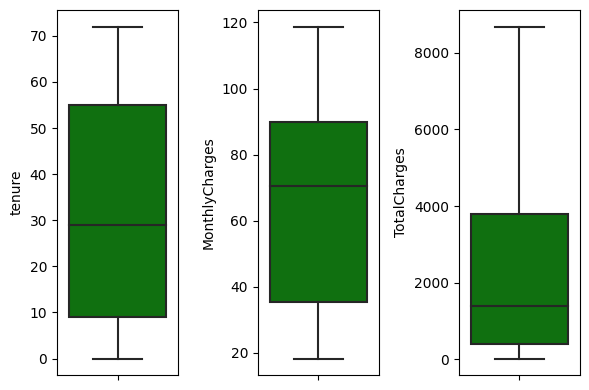

In [ ]:
plt.figure(figsize=(6,4)) #membuat plot dengan ukuran panjang 6 dan lebar 4
for i in range(0, len(nums)): #fungsi looping dari 0 hingga banyaknya kolom nums
    plt.subplot(1, 3, i+1) #untuk membuat sub plot
    sns.boxplot(y=df[nums[i]], color='green', orient='v') #membuat plot dengan bantuan library seaborn
    plt.tight_layout() #untuk merapatkan visualisasi

Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

Berdasarkan boxplot di atas diketahui:
1. Pada variabel `'tenure'`, `'MothlyCahrges'`, dan `'TotalCharges'` tidak memiliki nilai outlier artinya semua data berada pada batas minimum dan maksimum.
2. Distribusi data
- `tenure` : memiliki nilai median sekitar 29 bulan kemudian nilai minimum 0 dan nilai maksimum sekitar 70 bulan cutomer bertahan. Data tidak berdistribusi normal karena memiliki kecenderungan right skewness yang ditandai dengan whisker yang lebih tinggi pada bagian atas.
- `MonthlyCharges` : memiliki nilai median sekitar 70 kemudian nilai minimum sekitar 19 dan nilai maksimum sekitar 118. Data tidak berdistribusi normal karena memiliki kecenderungan left skewness yang ditandai dengan whisker yang lebih rendah pada bagian atas.
- `TotalCharges` : memiliki nilai median sekitar 1200 kemudian nilai minimum sekitar 100an dan nilai maksimum 8000 lebih. Data tidak berdistribusi normal karena memiliki kecenderungan right skewness yang ditandai dengan whisker yang lebih tinggi pada bagian atas.

### Histplot

Akan dibuat histogram plot untuk mengetahui sebaran data pada tiap variabel dan jenis distribusinya.

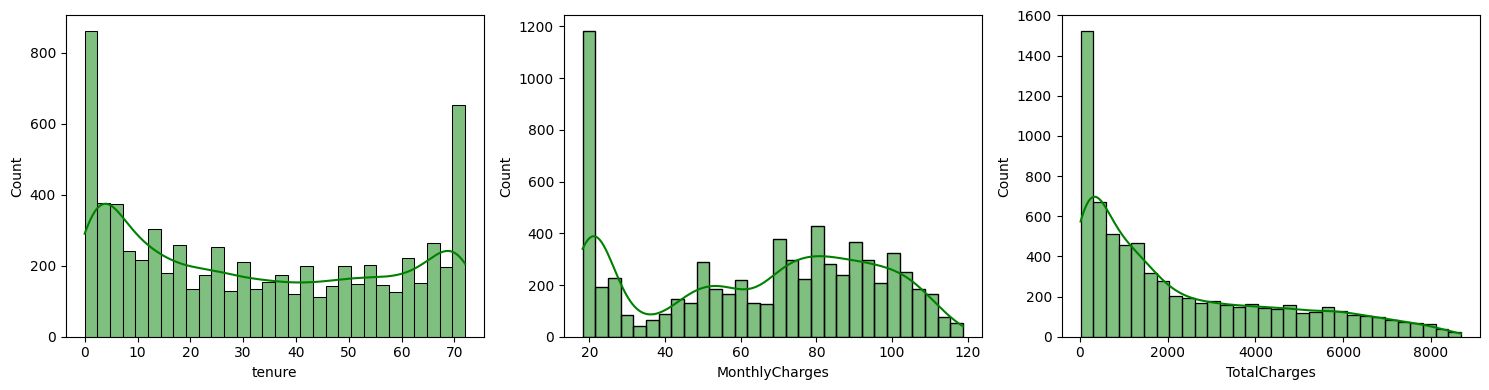

In [ ]:
plt.figure(figsize=(15, 4)) #membuat plot dengan ukuran panjang 15 dan lebar 4
for i in range(0, len(nums)): #fungsi looping dari 0 hingga jumlah variabel numerik
    plt.subplot(1, 3, i+1) #membuat subplot
    sns.histplot(df[nums[i]], color='green', kde=True, bins = 30) #membuat histplot dengan library seaborn
    plt.tight_layout() #merapatkan visualisasi

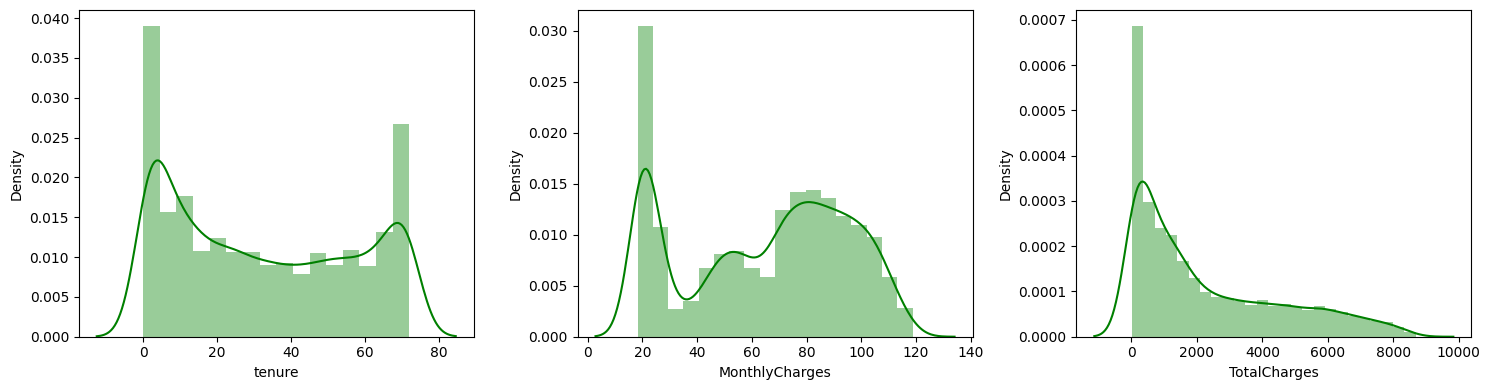

In [ ]:
plt.figure(figsize=(15, 4)) #membuat plot dengan ukuran panjan 15 dan lebar 4
for i in range(0, len(nums)): #fungsi looping dari 0 hingga jumlah variabel numerik
    plt.subplot(1, 3, i+1) #membuat subplot
    sns.distplot(df[nums[i]], color='green') #membuat displot dengan library seaborn
    plt.tight_layout() #merapatkan visualisasi

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin menmiliki makna tertentu

Berdasarkan histogram plot diketahui:
1. Distribusi data
- tenure : pada variabel ini terlihat bahwa frekuensi tertinggi pada customer yang bertahan dari 0-3 bulan dan bertahan hingga sekitar 68-71 bulan bertahan. Karena memiliki 2 nilai frekuensi yang besar maka variabel tenure termasuk ke dalam `distribusi bimodal`.
- MonthlyCharges : pada variabel ini terlihat bahwa frekuensi tertinggi pada monthly charges customer dari 19-25 dan monthly charges customer sekitar 72-80an. Karena memiliki 2 nilai frekuensi yang besar maka variabel MonthlyCharges termasuk ke dalam `distribusi bimodal`.
- TotalCharges : pada variabel ini terlihat bahwa frekuensi tertinggi pada total charges 0-250 dan dari grafik terlihat bahwa terdapat skewness ke arah kiri/left (negative skewness) sehingga distribusi dari Total Cahrges adalah `left-skewed distribution`.

### Countplot (categorical)

Akan dibuat countplot untuk mengetahui apakah terdapat ketimpangan pada setiap data kategorik.

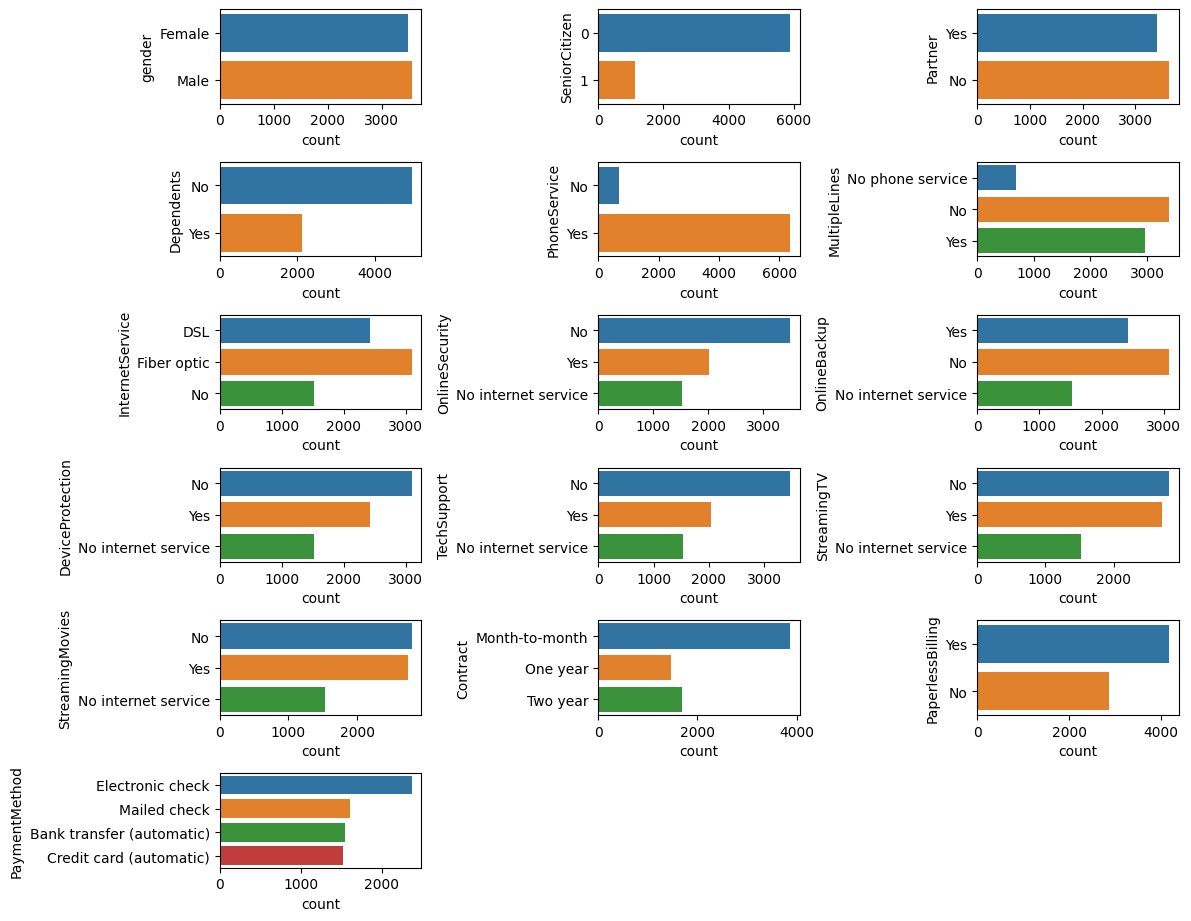

In [ ]:
plt.figure(figsize=(12, 15)) #membuat plot dengan ukuran panjang 12 dan lebar 15
for i in range(0, len(cats)): #fungsi looping dari i ke 0 hingga jumlah variabel kategorik
    plt.subplot(10, 3, i+1) #membuat subplot
    sns.countplot(y = df[cats[i]], orient='v') #membuat countplot dengan library seaborn dengan orientasi vertikal
    plt.tight_layout() #merapkan visualisasi

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

Berdasarkan countplot di atas dapat diketahui:

Dari 15 variabel kategorik, variabel `'PhoneService'` dan `'SeniorCitizen' `memiliki ketimpangan yang terlalu tinggi karena jumlah customer yang memiliki phone service dan customer yang merupakan senior citizen terlalu mendominasi dari keseluruhan data sehingga ada indikasi ketidakgunaan feature pada variabel 'PhoneService' dan 'SeniorCitizen'. Hal ini kurang baik karena akan membuat proses pemodelan pada machine learning gagal.

## Bivariate Analysis

### Boxplot

Akan dibuat boxplot pada masing-masing variabel numerik berdasarkan variabel target yaitu `'Churn'`

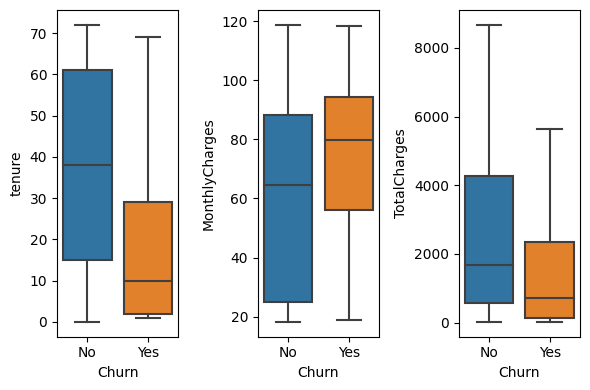

In [ ]:
plt.figure(figsize = (6,4)) #membuat plot dengan ukuran panjang 6 dan lebar 4
for i in range(0, len(nums)): #fungsi looping dari i ke 0 hingga jumlah variabel numerik
    plt.subplot(1, 3, i+1) #membuat subplot
    sns.boxplot(y = df[nums[i]], x = df['Churn'], orient = 'v', showfliers = False) #membuat boxplot dengan bantuan library seaborn 
    plt.tight_layout() #merapatkan visualisasi

Berdasarkan boxplot di atas dapat diketahui:
- `tenure` : nilai median antara customer yang churn dan tidak churn tidak berada dimasing-masing interquartile data. Artinya terdapat kemungkinan perbedaan antara customer yang churn dan tidak churn terhadap tenure dengan kata lain bahwa customer yang churn memiliki nilai tenure yang lebih pendek atau jangka waktunya cepat.
- `MonthlyCharges` : nilai median antara customer churn dan tidak masing berada dimasing-masing nilai interquartile. Artinya pengeluaran perbulan customer yang churn memiliki pengeluaran yang lebih tinggi dibandingkan pengeluaran perbulan customer yang tidak churn.
- `TotalCharges` : memiliki nilai median yang masih dalam masing-masing interquartile. Sebaran data pengeluaran total customer yang tidak churn juga lebih besar ditandai dengan lebih panjang whiskernya.

### Countplot

Akan dibuat countplot untuk melihat bagaimana presentase serta peluang setiap varibel 

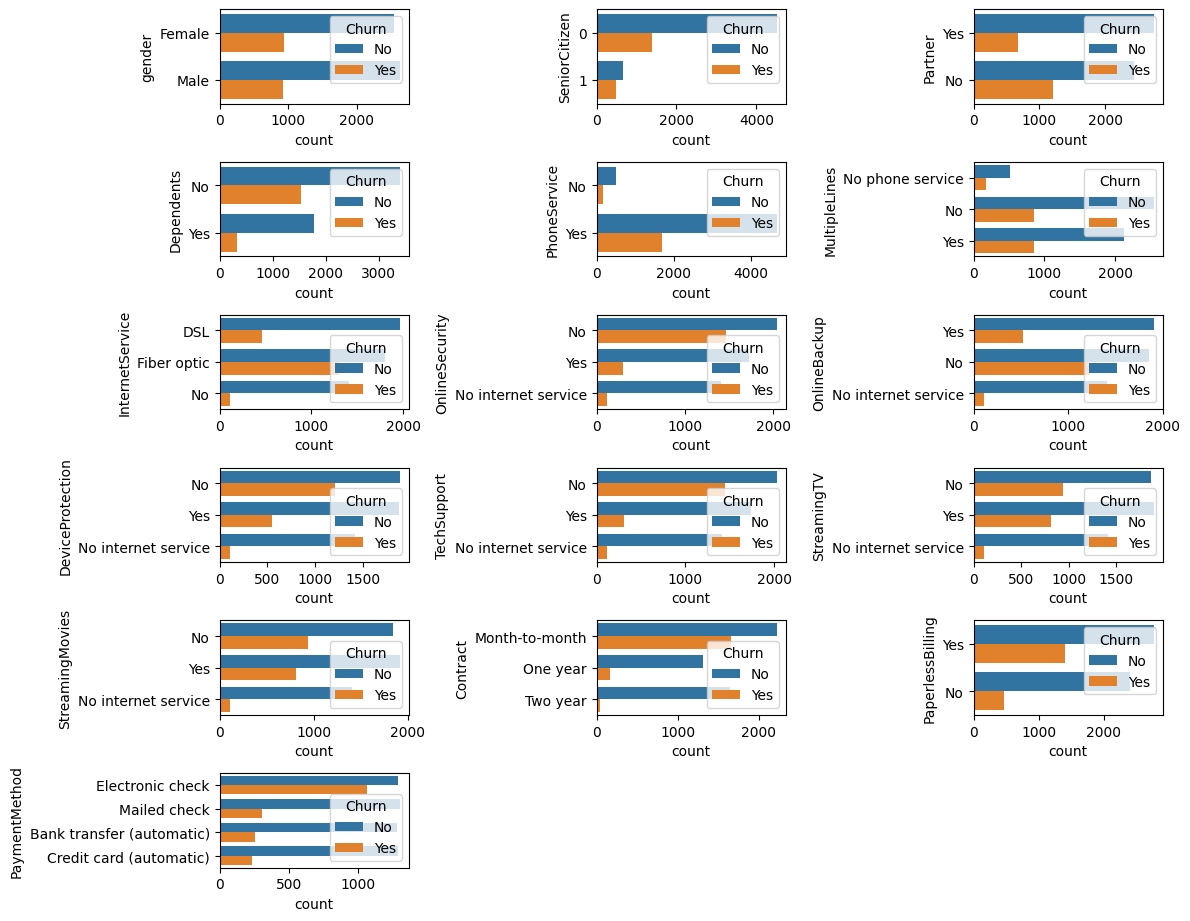

In [ ]:
plt.figure(figsize = (12,15)) #membuat plot dengan panjang 12 dan lebar 15
for i in range(0, len(cats)): #fungsi looping dari i ke 0 hingga jumlah data kategorik
    plt.subplot(10, 3, i+1) #membuat subplot
    sns.countplot(y = df[cats[i]], hue = df['Churn'], orient = 'v') #membuat countplot dengan bantuan library seaborn dengan orientasi vertikal
    plt.tight_layout() #merapatkan visualisasi

Berdasarkan countplot di atas dapat diketahui:
- `gender` : pada variabel ini terlihat bahwa presentase antara customer laki-laki dan perempuan hampir sama besar.
- `SeniorCitizen` : pada variabel ini terlihat bahwa presentase customer yang merupakan senior yang melakukan churn lebih tinggi dibandingkan customer yang bukan senior sehingga dapat dikatakan peluang customer yang senior lebih tinggi untuk melakukan churn dibandingkan customer yang bukan senior.
-` Partner` : pada variabel ini terlihat bahwa presentase customer yang tidak memiliki pasangan yang melakukan churn lebih tinggi dibandingkan customer yang memiliki pasangan sehingga dapat dikatakan peluang customer yang tidak memiliki pasangan lebih tinggi dibandingkan customer yang tidak memiliki pasangan untuk melakukan churn.
- `Dependent` : pada variabel ini terlihat bahwa presentase customer yang hidup mandiri yang melakukan churn lebih tinggi dibandingkan customer yang mandiri sehingga dapat dikatakan bahwa peluang customer yang tidak mandiri lebih tinggi dibandingkan customer yang mandiri untuk melakukan churn.
- `PhoneService` : pada variabel ini terlihat bahwa presentase customer yang memiliki layanan telepon yang melakuka churn lebih tinggi dibandingkan customer yang tidak memiliki layanan telepon sehingga dapat dikatakan bahwa peluang customer yang memiliki layanan phone service lebih tinggi dibandingkan yang tidak memiliki untuk melakukan churn.
- `MultipleLines` : pada variabel ini terlihat bahwa presentase customer yang memiliki dan tidak multiplelines hampir sama tetapi lebih besar dibandingkan customer yang memiliki jenis multiplelines no internet.
- `InternetService` : pada  variabel ini terlihat bahwa presentase customer dengan jenis layanan internet fiber optic lebih tinggi dibandingkan DSL atau tidak ada internet sehingga dapat dikatakan peluang customer melakukan churn lebih tinggi apabila jenis layanan internet fiber optic.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingMovie`, `SteramingTV` : pada ke lima variabel ini terlihat bahwa presentase cutomer yang tidak memiliki layanan ini yang melakukan churn lebih tinggi dibandingkan yang meiliki layanan tersebut.
- `Cotract` : pada variabel ini terlihat bahwa presentase customer yang melakukan kontrak month to month yang melakukan churn lebih tinggi dibandingkan customer dengan kontrak tahunan sehingga dapat dikatakan peluang customer month to month lebih tinggi dibandingkan customer kontrak tahunan untuk melakukan churn.
- `PaperLessBilling` : pada variabel ini terlihat bahwa presentase customer yang melakukan paperless billing yang melakukan churn lebih tinggi dibandingan yang tidak memiliki sehingga dapat dikatakan peluang orang melakukan churn lebih tinggi pada customer yang melakukan paperless billing.
- `PaymentMethod` : pada variabel ini terlihat bahwa presentase customer yang melakukan pembayaran dengan electronic check lebih banyak yang melakukan churn sehingga dapat dikatakan peluang customer dengan pembayaran electronic check lebih tinggi untuk melakukan churn.

## Multivariate Analysis

Setelah melihat setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

<Axes: >

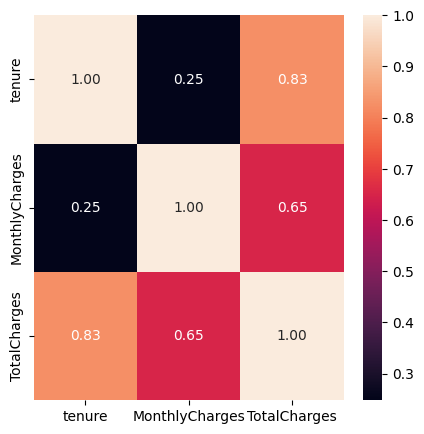

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

Berdasarkan heatmap di atas diketahui:

- Variabel `TotalCharges` memiliki korelasi positif dengan variabel `tenure` sebesar 0.65 dan variabel `MonthlyCharges` sebesar 0.83
- Tidak ada informasi yang menunjukkan bahwa ada dua fitur yang berkorelasi kuat (>0.9). Oleh karena itu, tidak dapat disimpulkan bahwa ada kemungkinan fitur yang redundan dalam dataset ini.

### Category Plot

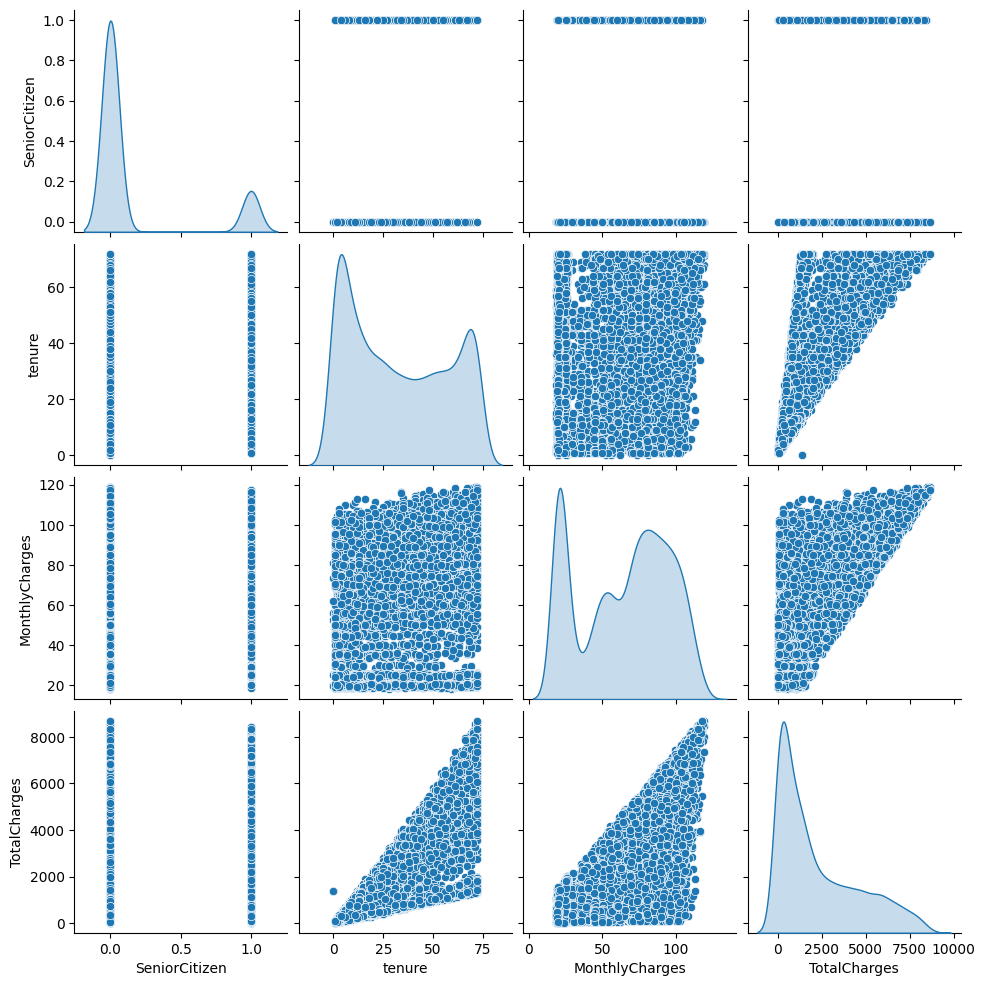

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

**Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru**

Berdasarkan plot di atas dapat diketahui:
- variabel `tenure` dan `MonthlyCharges` memiliki persebaran data yang merata tetapi tidak membentuk pola tertentu.
- variabel `tenure` dan `TotalCharges` memiliki persebaran data yang cukup merapa dan beberapa data menunjukan bahwa semakin tinggi nilai tenure semakin tinggi pula nilai TotalCharges, tetapi adapula beberapa data yang memiliki nilai tenure tinggi tetapi nilai TotalCharges tidak terlalu tinggi sehingga tidak dapat dipastikan hubungan atau jenis korelasi apa antar kedua variabel tersebut.
- variabel `MonthlyCharges` dan `TotalCharges` memiliki persebaran data yang cukup merapa dan beberapa data menunjukan bahwa semakin tinggi nilai MonthlyCharges semakin tinggi pula nilai TotalCharges, tetapi adapula beberapa data yang memiliki nilai MonthlyCharges tinggi tetapi nilai TotalCharges tidak terlalu tinggi sehingga tidak dapat dipastikan hubungan atau jenis korelasi apa antar kedua variabel tersebut.

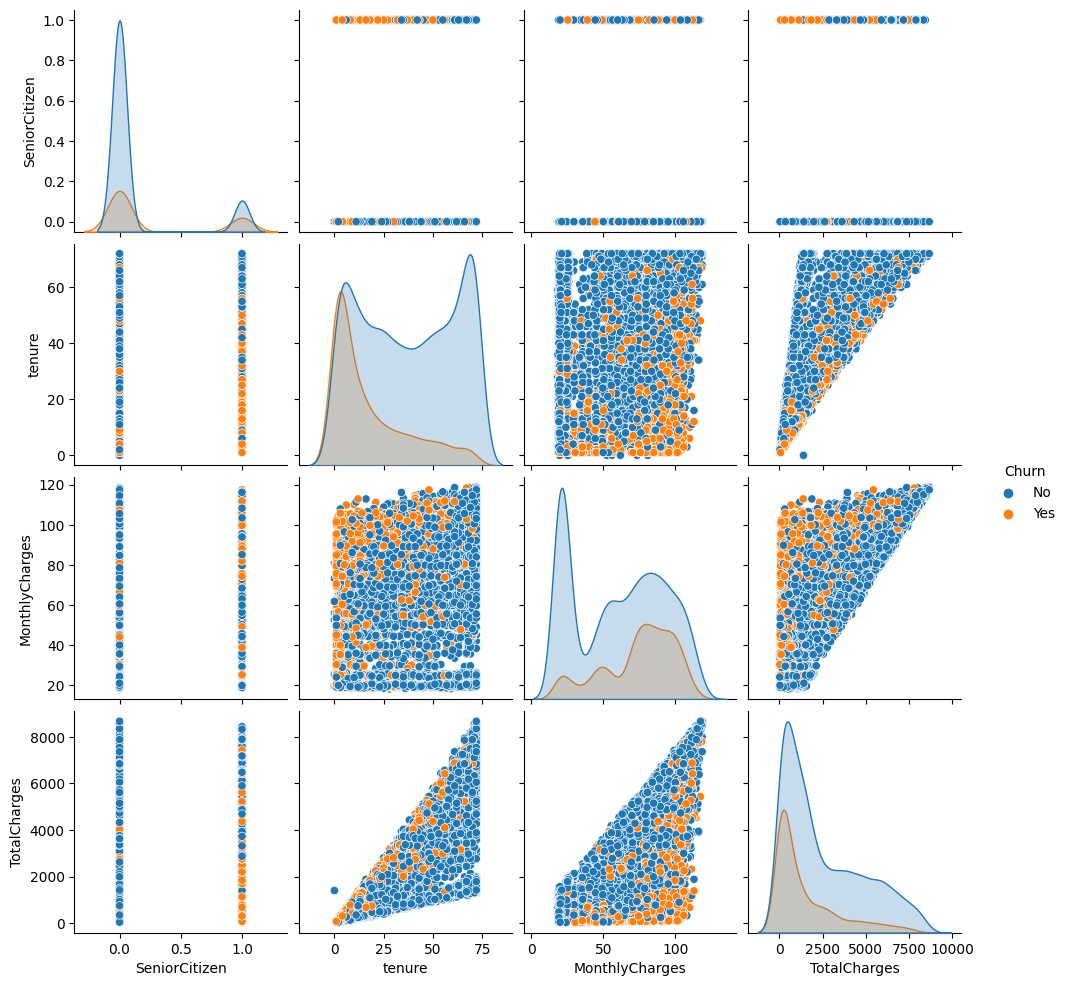

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn')

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

Berdasarkan scatterplot di atas dapat diketahui:
- Terdapat pola pengelompokan pada plot yang menunjukkan pelanggan yang melakukan churn(yes) meskipun mereka tidak sepenuhnya terpisah dari grup pelanggan yang tidak melakukan churn (no) lainnya. Artinya data tersebut cukup baik untuk dianalisis dengan harapan akurasi machine learning yang baik.